In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()  #FontProperties폰트지정함수 위치,이름(맑은고딕)
plt.rc("font", family=font_name)  

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

## 전기차 등록 데이터

In [3]:
evstock = pd.read_csv("data/IEA-EV-dataEV stockCarsHistorical.csv")
evstock.head(5)

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock,Cars,BEV,2011,stock,49
1,Australia,Historical,EV stock,Cars,BEV,2012,stock,220
2,Australia,Historical,EV stock,Cars,PHEV,2012,stock,80
3,Australia,Historical,EV stock,Cars,PHEV,2013,stock,180
4,Australia,Historical,EV stock,Cars,BEV,2013,stock,410


In [28]:
evstock.region.unique()

array(['Australia', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland',
       'India', 'Italy', 'Japan', 'Korea', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Other Europe', 'Poland', 'Portugal',
       'South Africa', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom',
       'USA', 'World'], dtype=object)

In [10]:
evstock.groupby('year').sum()

,value
year,
2010,34792
2011,129369
2012,375622
2013,776868
2014,1412312
2015,2494333
2016,4004393
2017,6222811
2018,10093220


#### 나라 지정

In [5]:
USA = evstock.loc[evstock['region']=='USA']

In [6]:
s_world = evstock.loc[evstock['region']=='World'].groupby('year').sum().reset_index()

In [7]:
s_N = evstock.loc[evstock['region']=='Netherlands'].groupby('year').sum().reset_index()

In [8]:
s_korea = evstock.loc[evstock['region']=='Korea'].groupby('year').sum().reset_index()

## 충전소 데이터

In [9]:
evcharging = pd.read_csv("data/IEA-EV-dataEV charging pointsHistorical.csv")
evcharging.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV charging points,EV,Publicly available fast,2017,charging points,40.0
1,Australia,Historical,EV charging points,EV,Publicly available slow,2017,charging points,440.0
2,Australia,Historical,EV charging points,EV,Publicly available fast,2018,charging points,61.0
3,Australia,Historical,EV charging points,EV,Publicly available slow,2018,charging points,670.0
4,Australia,Historical,EV charging points,EV,Publicly available fast,2019,charging points,250.0


#### 나라 지정

In [10]:
c_world = evcharging.loc[evcharging['region']=='World'].groupby('year').sum().reset_index()

In [11]:
c_N = evcharging.loc[evcharging['region']=='Netherlands'].groupby('year').sum().reset_index()

In [12]:
c_korea = evcharging.loc[evcharging['region']=='Korea'].groupby('year').sum().reset_index()

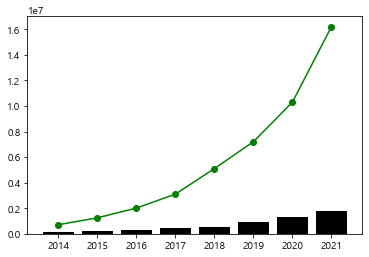

In [15]:
#2014년이후로 범위 지정
c_world1=c_world.loc[c_world['year']>=2014]
s_world1=s_world.loc[s_world['year']>=2014]

#전세계 전기차 등록대수 & 충전기 개수
plt.bar(c_world1["year"], c_world1["value"], color="k")
plt.plot(s_world1["year"], s_world1["value"], 'o-', color="green")

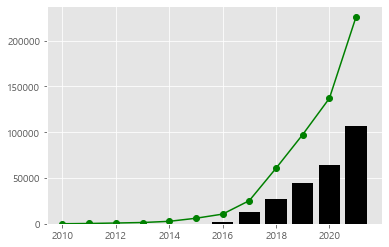

In [134]:
#한국
plt.bar(c_korea["year"], c_korea["value"], color="k")
plt.plot(s_korea["year"], s_korea["value"], 'o-', color="green")

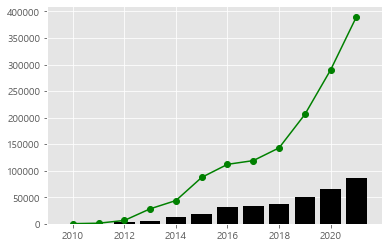

In [138]:
#네덜란드
plt.bar(c_N["year"], c_N["value"], color="k")
plt.plot(s_N["year"], s_N["value"], 'o-', color="green")

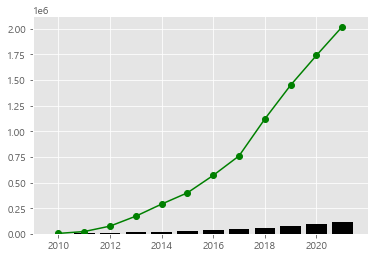

In [141]:
#USA
plt.bar(evcharging.loc[evcharging['region']=='USA'].groupby('year').sum().reset_index()["year"], 
        evcharging.loc[evcharging['region']=='USA'].groupby('year').sum().reset_index()["value"], color="k")
plt.plot(evstock.loc[evstock['region']=='USA'].groupby('year').sum().reset_index()["year"], 
         evstock.loc[evstock['region']=='USA'].groupby('year').sum().reset_index()["value"], 'o-', color="green")

#### 이중축 그래프 - 사용X

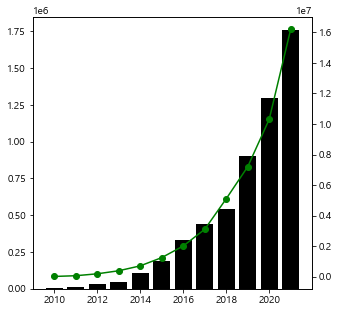

In [16]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
fig.set_size_inches([5,5])
ax1.bar(c_world["year"], c_world["value"], color="k")
ax2.plot(s_world["year"], s_world["value"], 'o-', color="green")

## 충전기 1기 당 등록차량 대수

In [18]:
#World 
evstock_year=evstock.loc[evstock['region']=='World'].groupby('year').sum().reset_index()
evstock_year.rename(columns={"value":"evstock"}, inplace=True)
evstock_year

,year,evstock
0,2010,17400
1,2011,64500
2,2012,190000
3,2013,390000
4,2014,710000
5,2015,1250000
6,2016,2010000
7,2017,3100000
8,2018,5100000
9,2019,7200000


In [19]:
evcharging_year = evcharging.loc[evcharging['region']=='World'].groupby('year').sum().reset_index()
evcharging_year.rename(columns={"value":"evchargingPoint"}, inplace=True)
evcharging_year

,year,evchargingPoint
0,2010,4010.0
1,2011,10830.0
2,2012,31700.0
3,2013,47800.0
4,2014,106000.0
5,2015,187000.0
6,2016,335000.0
7,2017,440000.0
8,2018,540000.0
9,2019,900000.0


In [20]:
ev = pd.merge(evstock_year, evcharging_year)

In [21]:
ev["per"] = ev["evstock"]/ev["evchargingPoint"]

In [22]:
ev

,year,evstock,evchargingPoint,per
0,2010,17400,4010.0,4.339152
1,2011,64500,10830.0,5.955679
2,2012,190000,31700.0,5.993691
3,2013,390000,47800.0,8.158996
4,2014,710000,106000.0,6.698113
5,2015,1250000,187000.0,6.684492
6,2016,2010000,335000.0,6.000000
7,2017,3100000,440000.0,7.045455
8,2018,5100000,540000.0,9.444444
9,2019,7200000,900000.0,8.000000


In [23]:
#한국
skorea_year=evstock.loc[evstock['region']=='Korea'].groupby('year').sum().reset_index()
skorea_year.rename(columns={"value":"evstock"}, inplace=True)
ckorea_year = evcharging.loc[evcharging['region']=='Korea'].groupby('year').sum().reset_index()
ckorea_year.rename(columns={"value":"evchargingPoint"}, inplace=True)

In [24]:
korea = pd.merge(skorea_year, ckorea_year)

In [25]:
korea["per"] = korea["evstock"]/korea["evchargingPoint"]
korea

,year,evstock,evchargingPoint,per
0,2016,10580,2020.0,5.237624
1,2017,25300,13300.0,1.902256
2,2018,60600,27200.0,2.227941
3,2019,97400,44400.0,2.193694
4,2020,137000,63800.0,2.147335
5,2021,226000,107000.0,2.112150
